# Convolutional Neural Networks in Python with Keras

## Introduction

1. Deep learning is a subfield of machine learning that is inspired by artificial neural networks, which in turn are inspired by biological neural networks.
2. CNN or ConvNet(Convolutional Neural Network) is a deep feed-forward artificial neural network.
3. feed-forward neural networks are also called multi-layer perceptrons(MLPs)
4. it is called "feed-forward" because information flows right through the model and there are no feedback connections.
5. Convolutional neural networks performed a lot better than traditional computer vision and have produced state-of-the-art results.
   * Image classification, object detection, segmentation, face recognition;
   * Self driving cars that leverage CNN based vision systems;
   * Classification of crystal structure using a convolutional neural network;


## Dataset

### Fashion-MNIST

*Link*: https://arxiv.org/abs/1708.07747
1. It contains grayscale images of 10 different categories of clothing, making it useful for testing image classification algorithms
2. dataset comprising of 28x28 grayscale images of 70,000 fashion products from 10 categories, with 7,000 images per category.
3. The training set has 60,000 images and the test set has 10,000 images.
4. The dataset contains 10 categories:
    * 0: T-shirt/top
    * 1: Trouser
    * 2: Pullover
    * 3: Dress
    * 4: Coat
    * 5: Sandal
    * 6: Shirt
    * 7: Sneaker
    * 8: Bag
    * 9: Ankle boot
5. Each image is associated with a label (0–9) corresponding to one of the clothing categories.

### Load the Data

In [1]:
from keras.datasets import fashion_mnist, mnist 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [4]:
fashion_mnist = {
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot",
}

Category:  Ankle Boot


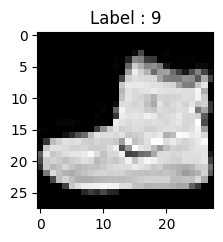

In [5]:
# Display the image in dataset
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
category = fashion_mnist[train_Y[0]]
plt.title("Label : {}".format(train_Y[0]))
print("Category: ", category)

### MNIST

*Link:*  https://yann.lecun.com/exdb/mnist/
1. The MNIST dataset contains grayscale images of handwritten digits (0-9).
2. Each image is a 28x28 pixel matrix, flattened into a 1D array of 784 features.
3. Training Set: 60,000 images, Test Set: 10,000 images
4. The dataset includes 10 classes, representing the digits from 0 to 9.
5. Each image has a corresponding label indicating which digit it represents.

### Load the Data

In [6]:
(mnist_train_X,mnist_train_Y), (mnist_test_X,mnist_test_Y) = mnist.load_data()
print('Training data shape : ', mnist_train_X.shape, mnist_train_Y.shape)
print('Testing data shape : ', mnist_test_X.shape, mnist_test_Y.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [7]:
# Find the unique numbers from the train labels
classes = np.unique(mnist_train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [8]:
mnistDict = {
    0:"Digit 0",
    1:"Digit 1",
    2:"Digit 2",
    3:"Digit 3",
    4:"Digit 4",
    5:"Digit 5",
    6:"Digit 6",
    7:"Digit 7",
    8:"Digit 8",
    9:"Digit 9",
}

Category:  Digit 5


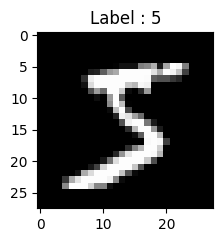

In [11]:
# Display the image in dataset
plt.figure(figsize=[5,5])
plt.subplot(121)
category = mnistDict[mnist_train_Y[0]]
plt.imshow(mnist_train_X[0,:,:], cmap='gray')
plt.title("Label : {}".format(mnist_train_Y[0]))
print("Category: ", category)

## Data Preprocessing

1. convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.

In [12]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

2. The data is initially in int8 format (integer values ranging from 0 to 255 for grayscale images). Converting to float32 ensures that division operations retain precision.
3. Pixel values in the original dataset range from 0 to 255. Dividing by 255.0 scales the values to the range [0, 1]. This is called Normalizing the data

In [13]:
train_X = train_X.astype('float32') 
test_X = test_X.astype('float32')
train_X = train_X / 255. 
test_X = test_X / 255.

## Vectorization of the lablels 

1. We use a simplest one-hot encoding, you convert the categorical data into a vector of numbers.
2. For your problem statement, the one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10. The important thing to note here is that the vector consists of all zeros except for the class that it represents, and for that, it is 1. For example, the ankle boot image that you plotted above has a label of 9, so for all the ankle boot images, the one hot encoding vector would be [0 0 0 0 0 0 0 0 1 0].

In [14]:
from keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=1)

In [17]:
print("Shape of the Train and Validation Dataset: ")
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

Shape of the Train and Validation Dataset: 


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [19]:
import keras
from keras.layers import Input
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [27]:
BATCH_SIZE = 64 # 128, 256
EPOCHS = 20
NUMBER_OF_CLASSES = 10

## Neural Network Architecture

1. first add a first convolutional layer with Conv2D()
2. we will add 3 convolution layers i.e. 32, 64, and 128
3. add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries
4. Since you have ten different classes, you'll need a non-linear decision boundary that could separate these ten classes which are not linearly separable.
5. add the max-pooling layer with MaxPooling2D()
6. last layer is the Dense layer that has a softmax activation function with 10 units, which is needed for the multi-class classification problem

In [24]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

## Compile the Model

1. compile it using the [Adam optimizer](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/). Additionally, we use categorical cross entropy which is a loss function which is used for multi-class classification, we can also try binary cross-entropy. Lastly, we specify the metrics which we need to analyze during the model training, in this case it is accuracy.

In [25]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [26]:
fashion_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [28]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.7524 - loss: 0.6798 - val_accuracy: 0.8848 - val_loss: 0.3116
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.8900 - loss: 0.3004 - val_accuracy: 0.9029 - val_loss: 0.2622
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9127 - loss: 0.2400 - val_accuracy: 0.9015 - val_loss: 0.2648
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9207 - loss: 0.2123 - val_accuracy: 0.9157 - val_loss: 0.2284
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9332 - loss: 0.1802 - val_accuracy: 0.9167 - val_loss: 0.2307
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9433 - loss: 0.1564 - val_accuracy: 0.9149 - val_loss: 0.2417
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.9471 - loss: 0.1389 - val_accuracy: 0.9149 - val_loss: 0.2395
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9573 - loss: 0.1136 - 

## Model Evaluation on the Test Set

In [32]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9173 - loss: 0.4718
Test loss: 0.4648946225643158
Test accuracy: 0.9172999858856201


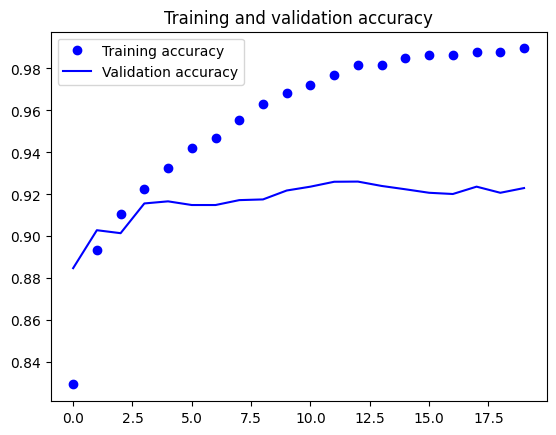

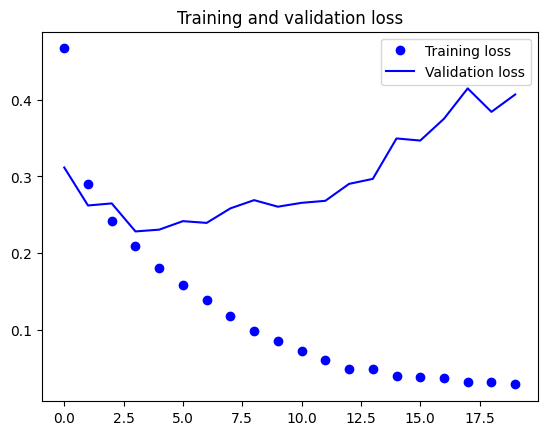

In [33]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### Analysis of the Results

From the above two plots, we can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

### Adding Dropout to the CNN to reduce overfitting

1. add a dropout layer to overcome the problem of overfitting. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount.
2. The fraction of neurons to "drop" is controlled by a hyperparameter (e.g., rate=0.2 for 20%)

In [34]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [35]:
fashion_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_15 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [37]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.6731 - loss: 0.8788 - val_accuracy: 0.8635 - val_loss: 0.3629
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.8539 - loss: 0.3974 - val_accuracy: 0.8865 - val_loss: 0.3009
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.8713 - loss: 0.3421 - val_accuracy: 0.8970 - val_loss: 0.2732
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.8870 - loss: 0.3055 - val_accuracy: 0.8939 - val_loss: 0.2796
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 65ms/step - accuracy: 0.8959 - loss: 0.2857 - val_accuracy: 0.9078 - val_loss: 0.2417
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 59ms/step - accuracy: 0.9001 - loss: 0.2674 - val_accuracy: 0.9089 - val_loss: 0.2363
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.9021 - loss: 0.2602 - val_accuracy: 0.9135 - val_loss: 0.2274
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9042 - loss: 0.2549 - 

## Save the Model

In [38]:
fashion_model.save("fashion_model_dropout.h5")

## Evaluate Model with Dropout

In [39]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9201 - loss: 0.2194
Test loss: 0.2139744907617569
Test accuracy: 0.9207000136375427


## Analyze the Results with Dropout Layer

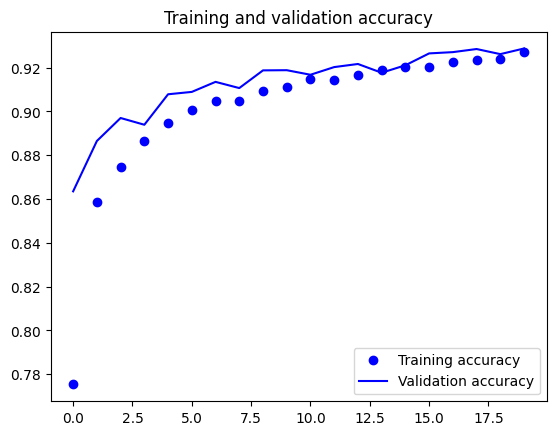

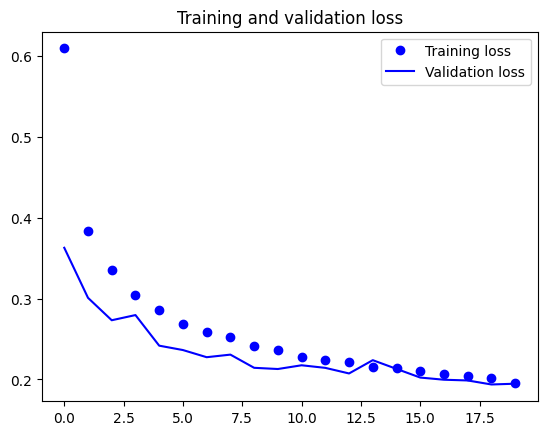

In [41]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Predict Labels

1. the predictions we get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, you will round off the output which will convert the float values into an integer.
2. further, you will use np.argmax() to select the index number which has a higher value in a row.
3. for example, let's assume a prediction for one test image to be 0 1 0 0 0 0 0 0 0 0, the output for this should be a class label 1.

In [45]:
predicted_classes = fashion_model.predict(test_X)
print(predicted_classes[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
[1.9923982e-13 1.9708796e-14 1.9109260e-15 9.4850061e-13 1.8036813e-15
 5.5888989e-08 2.7797320e-13 6.2961681e-06 2.1658836e-15 9.9999362e-01]


In [46]:
print(np.round(predicted_classes[0]))
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


In [47]:
print("The Shape of the Predicted Class: ")
predicted_classes.shape, test_Y.shape

The Shape of the Predicted Class: 


((10000,), (10000,))

Found 9155 correct labels


<ipython-input-50-0178221d62f4>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


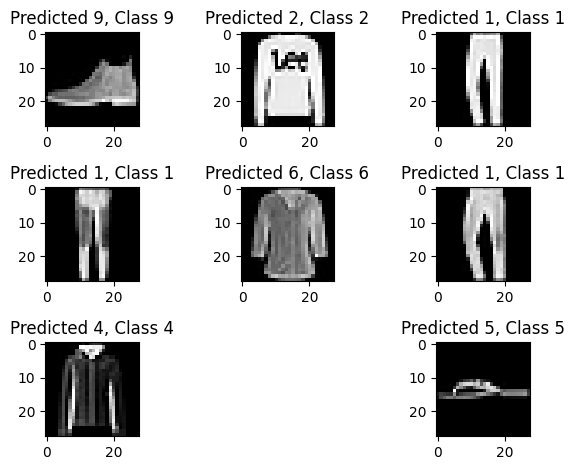

In [50]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 845 incorrect labels


<ipython-input-51-0bf9e7d6e015>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


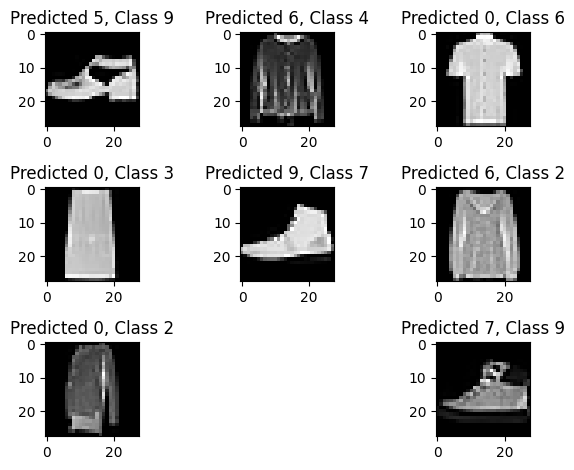

In [51]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()


In [52]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.76      0.91      0.82      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.88      0.88      0.88      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.91      0.84      0.87      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.80      0.73      0.76      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Further, we can change the batch size, epochs, the loss functions and compare the results. Also,try the same excersie for the MINST Handwritten Digit Dataset.

### Thank You